In [1]:
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [10]:
y, sr = librosa.load('/home/werner/Music/werner_Julie sitting on the grass_2019-07-27T21:50:08.888Z.wav')

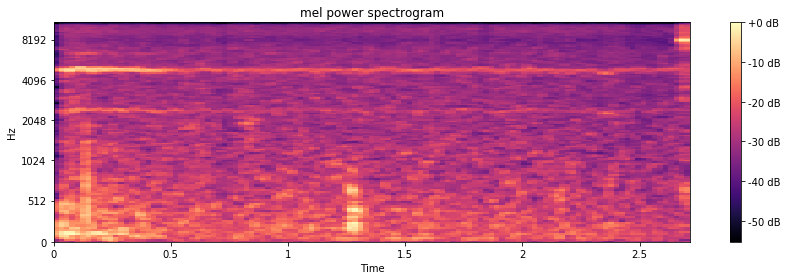

In [11]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [12]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

array([[-3.8775217e+02, -2.9648007e+02, -2.6404959e+02, ...,
        -3.2667352e+02, -2.9558112e+02, -2.9567490e+02],
       [ 6.1188538e+01,  5.7997036e+01,  5.3437027e+01, ...,
         1.1602158e+01, -4.3852468e+00, -6.2982998e+00],
       [ 3.2979721e+01,  2.9537979e+01,  2.1242758e+01, ...,
         1.6638554e+01,  2.8710312e+01,  2.9290936e+01],
       ...,
       [ 1.5993844e-01,  1.5993844e-01,  1.5993844e-01, ...,
        -1.2526113e+00, -1.2526113e+00, -1.2526113e+00],
       [ 8.5920215e-01,  8.5920215e-01,  8.5920215e-01, ...,
         2.0694768e+00,  2.0694768e+00,  2.0694768e+00],
       [-4.4468242e-01, -4.4468242e-01, -4.4468242e-01, ...,
        -4.9623370e-02, -4.9623370e-02, -4.9623370e-02]], dtype=float32)

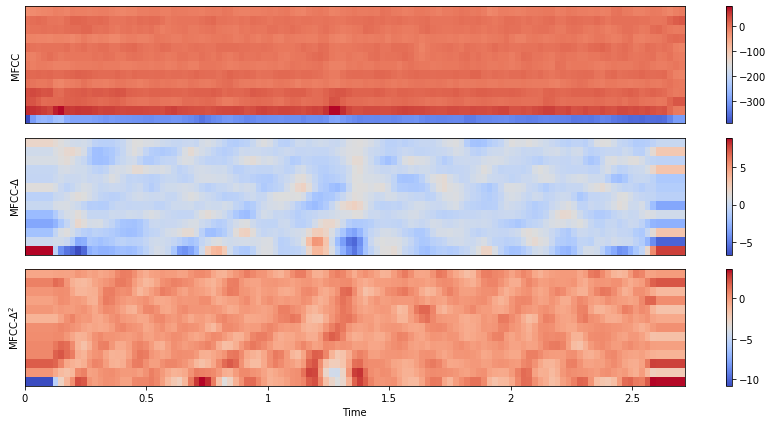

In [14]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])
M

In [17]:
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)
mfcc

array([[-3.8775217e+02, -2.9648007e+02, -2.6404959e+02, ...,
        -3.2667352e+02, -2.9558112e+02, -2.9567490e+02],
       [ 6.1188538e+01,  5.7997036e+01,  5.3437027e+01, ...,
         1.1602158e+01, -4.3852468e+00, -6.2982998e+00],
       [ 3.2979721e+01,  2.9537979e+01,  2.1242758e+01, ...,
         1.6638554e+01,  2.8710312e+01,  2.9290936e+01],
       ...,
       [ 2.3845136e-01,  3.8700104e+00,  3.6515298e+00, ...,
        -2.9243941e+00, -5.1861219e+00, -4.9963889e+00],
       [ 3.0354843e+00,  6.7999134e+00,  9.7805252e+00, ...,
         1.3366701e+01,  2.3953346e+01,  2.7517784e+01],
       [-2.5950386e+01, -2.2293083e+01, -1.8874657e+01, ...,
        -1.6653439e+01, -9.6361885e+00, -5.8960404e+00]], dtype=float32)